**Hospital Insurance Regression Analysis**

**Introduction**

This report presents an analysis of an insurance dataset using linear regression. Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. In the context of insurance, linear regression can help us understand how different factors influence insurance charges. We have used the Numpy, Matplotlib, and Sklearn libraries for this implementation. The primary objective of this analysis is to develop a model that accurately predicts healthcare insurance charges, which can have practical applications in the healthcare domain.

**Data Loading**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset
path="/content/drive/MyDrive/Lab1/Insurance.csv"
df = pd.read_csv(path)

**Exploratory Data Analysis**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Dataset Description**
The insurance dataset used for this analysis contains information about various individuals and their insurance premiums. The dataset includes the following variables:

**Age:** The age of the insured individual.
**BMI:** Body Mass Index, a measure of body fat based on height and weight.
**Children:** The number of children/dependents covered by the insurance.
**Smoker:** Whether the individual is a smoker or not (binary: Yes/No).
**Region:** The region of the individual (e.g., Northeast, Southeast, Southwest, Northwest).
**Charges:** The insurance charges (dependent variable) for the individual.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

The dataset consists of several key attributes that influence health insurance charges. These include 'Age', representing the age of the primary beneficiary; 'Sex', indicating the gender of the insurer(female or male); 'BMI', which provides insights into the individual's body mass index, offering an objective measure of body weight relative to height, often categorized as underweight, healthy weight, or overweight; 'Children', revealing the number of children or dependents covered by the health insurance plan; 'Smoker', denoting whether the individual is a smoker or not; and 'Region', signifying the residential area of the beneficiary within the US, encompassing four geographical divisions: northeast, southeast, southwest, and northwest. These attributes collectively offer essential information for understanding the factors that contribute to variations in health insurance charges across different individuals and regions.

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X[:5]

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

**Visualize the data**

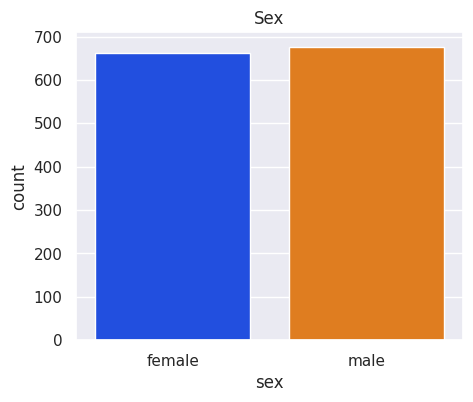

In [ ]:
sns.set()
plt.figure(figsize=(5,4))
sns.countplot(x='sex',data=df, palette='bright')
plt.title('Sex')
plt.show()

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0, 0.5, 'Count')

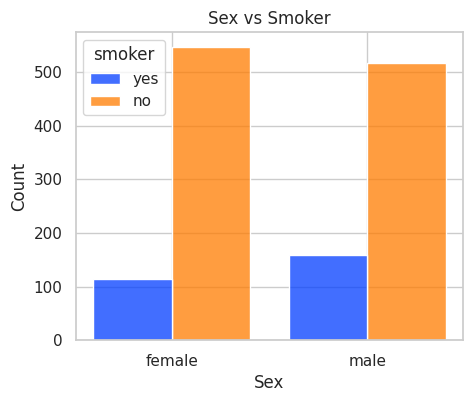

In [ ]:
#sex vs smoker
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
hist = sns.histplot(data=df, x="sex", hue="smoker", multiple="dodge", shrink=0.8, palette='bright')
plt.title("Sex vs Smoker")
plt.xlabel("Sex")
plt.ylabel("Count")

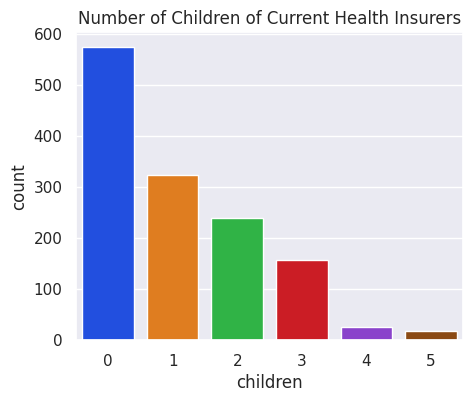

In [ ]:
#Number of children
sns.set()
plt.figure(figsize=(5, 4))
sns.countplot(x='children',data=df,palette='bright')
plt.title('Number of Children of Current Health Insurers')
plt.show()

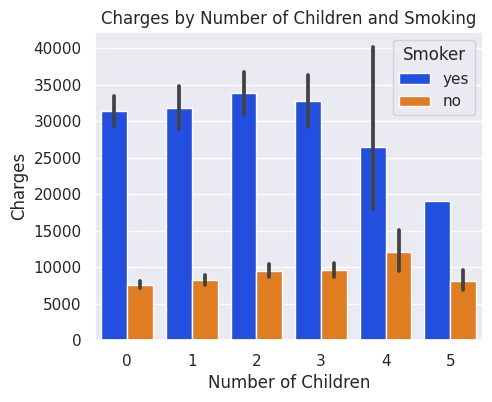

In [ ]:
#Charges by Number of Children and Smoking
plt.figure(figsize=(5, 4))
sns.barplot(x='children', y='charges', hue='smoker', data=df, palette='bright')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges by Number of Children and Smoking')
plt.legend(title='Smoker')
plt.show()

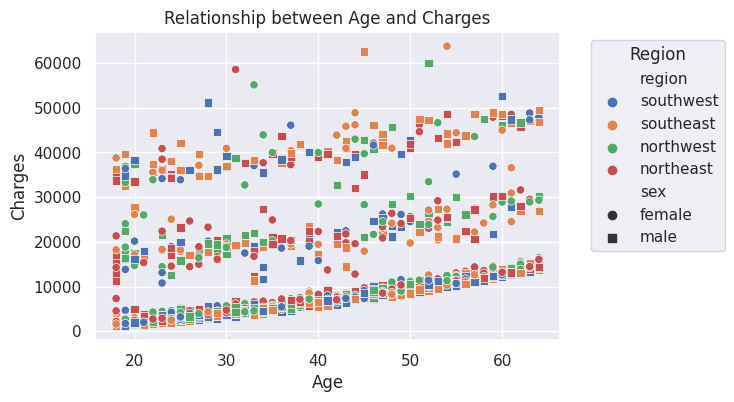

In [ ]:
# visualize the relationship between age and charges
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(data=df, x="age", y="charges", hue="region", style="sex", markers=["o", "s"])
plt.title('Relationship between Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
scatter.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 500x400 with 0 Axes>

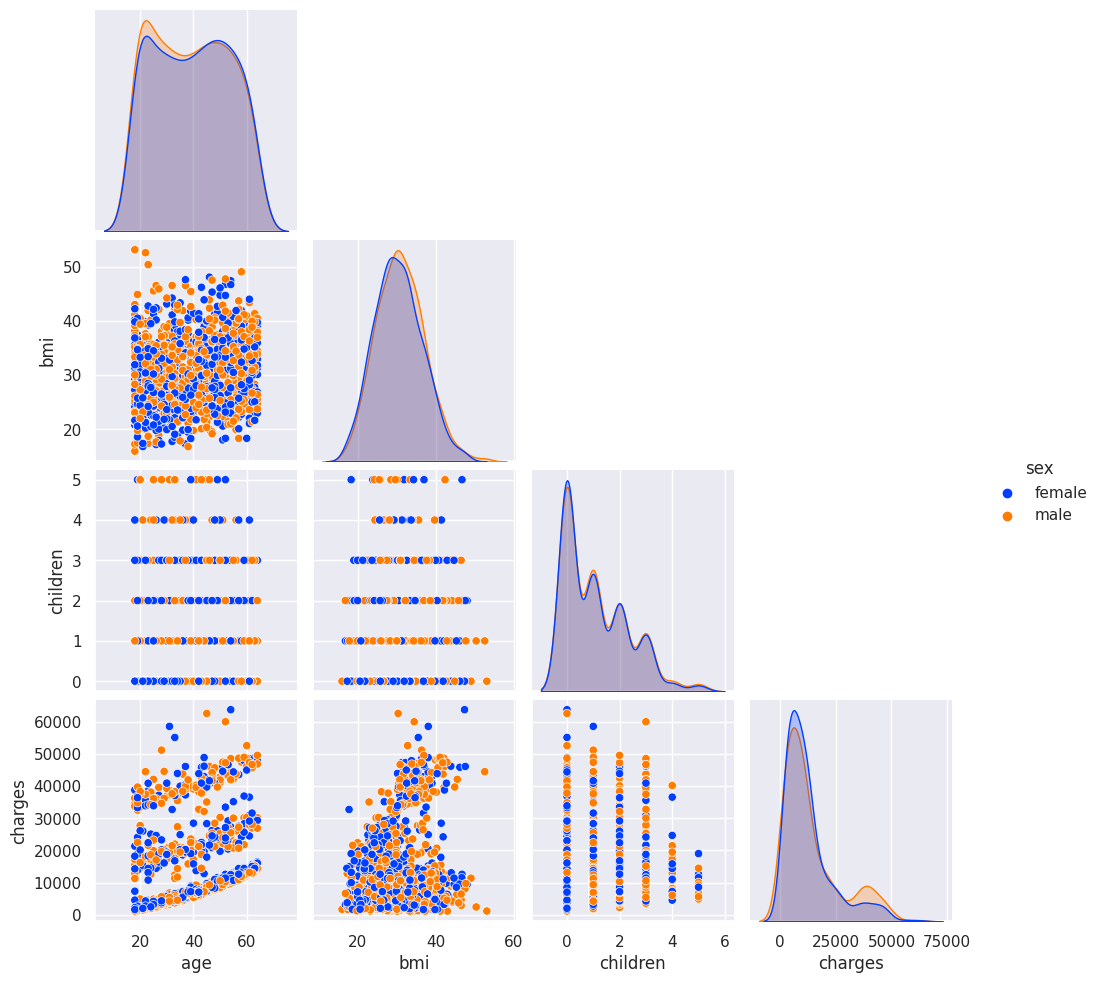

In [ ]:
plt.figure(figsize=(5,4))
sns.pairplot(data=df, hue='sex', corner = True, palette='bright')

The age versus charge plot demonstrates a noticeable upward trend in charges as age increases. Regarding BMI versus charge,the pattern is not clear,but there appears to be a certain level of connection between higher BMI values and increased charges. However, the scatterplot doesn't provide a clear indication of a correlation between the number of children and charges.
illustrates the usage of the value zero to signify females and the value one for males. On the x-axis, the BMI values corresponding to gender categories (male and female) are displayed, while the y-axis represents the charges. Evidently, changes in BMI values directly correspond to shifts in insurance charges,

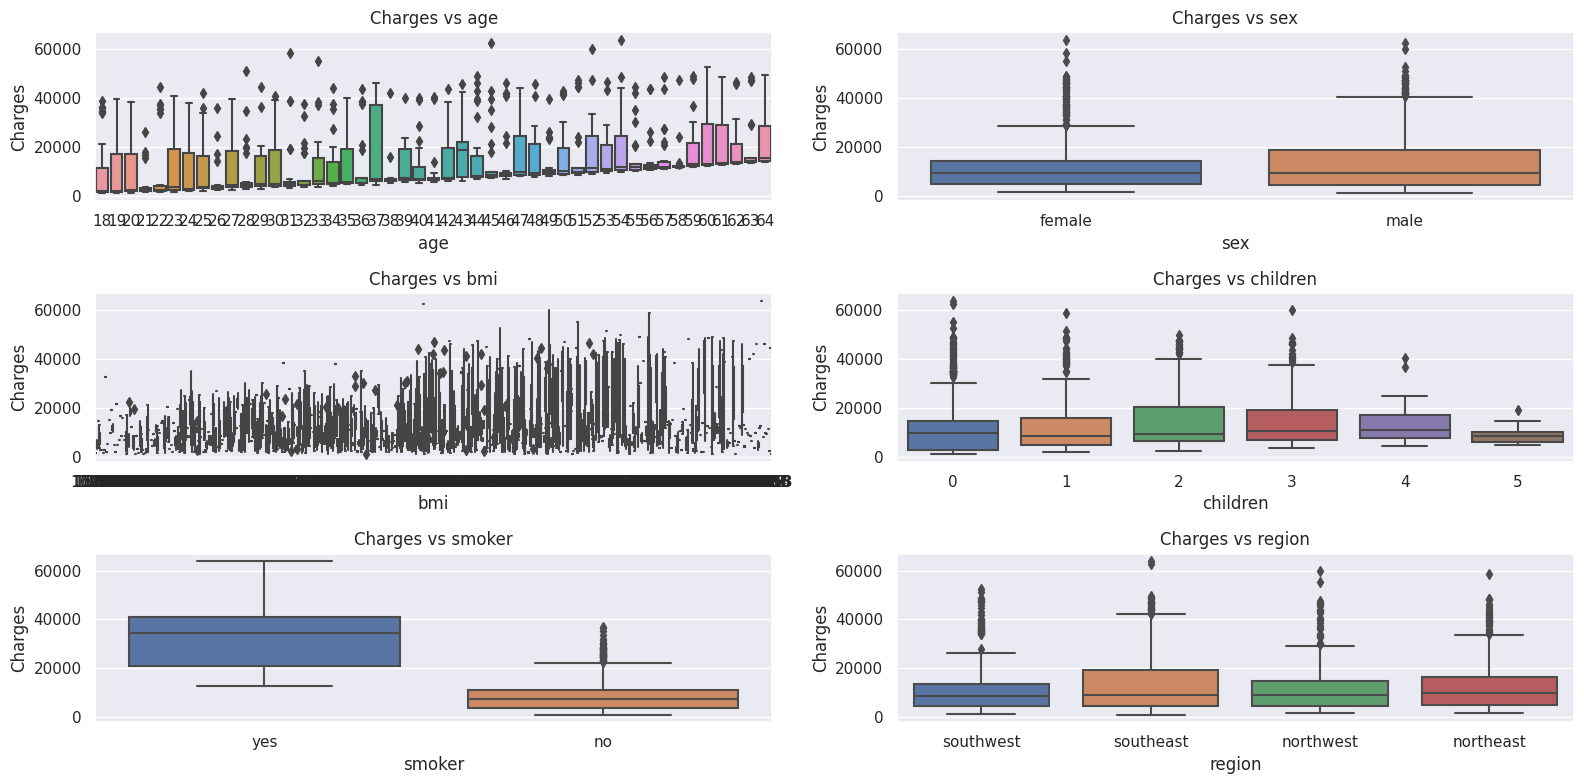

In [ ]:
# Boxplots of response variable (charges) against each feature
plt.figure(figsize=(16, 8))
num_features = len(df.columns) - 1
cols_per_row = 2

for idx, feature in enumerate(df.columns.drop('charges')):
    plt.subplot((num_features + 1) // cols_per_row, cols_per_row, idx + 1)
    sns.boxplot(x=feature, y='charges', data=df)
    plt.title(f'Charges vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')

plt.tight_layout()
plt.show()

Linear regression is influenced by the presence of outliers, making it crucial to examine and address these in the model. Outliers can be identified by analyzing residuals, which represent the variations between observed and predicted values. We employed standardized residuals to detect outliers, wherein a standard residual is essentially the outcome of dividing the residual by the anticipated value of a given data point.

A noticeable connection exists between smoking and charges,same appears for  age and charges, as age increases so is the charge. Gender does play a role on the charges as there is a minimal impact on charges, given that the average charge for both genders are nearly equal. Similarly, the region doesn't appear to significantly affect the charges.

**Data Pre-processing**

In [ ]:
#Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#duplicate values check
df.duplicated().sum()

1

In [ ]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#Separate numerical and categorical columns
from sklearn.preprocessing import StandardScaler

#Scale the numerical columns
scaler = StandardScaler()
# Separate numerical and categorical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

#Scale the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

#Display the scaled DataFrame
print(df.head())

        age     sex       bmi  children smoker     region   charges
0 -1.440418  female -0.453160 -0.909234    yes  southwest  0.297857
1 -1.511647    male  0.509422 -0.079442     no  southeast -0.954381
2 -0.799350    male  0.383155  1.580143     no  southeast -0.729373
3 -0.443201    male -1.305052 -0.909234     no  northwest  0.719104
4 -0.514431    male -0.292456 -0.909234     no  northwest -0.777499


In [ ]:
# Perform one-hot encoding (get dummies) for categorical variables
encoded_df = pd.get_dummies(data=df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first 5 rows of the encoded DataFrame
print("Encoded Data:")
print(encoded_df.head())

Encoded Data:
        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.440418 -0.453160 -0.909234  0.297857         0           1   
1 -1.511647  0.509422 -0.079442 -0.954381         1           0   
2 -0.799350  0.383155  1.580143 -0.729373         1           0   
3 -0.443201 -1.305052 -0.909234  0.719104         1           0   
4 -0.514431 -0.292456 -0.909234 -0.777499         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


In [ ]:
# Split data into features (X) and target (y)
X = encoded_df.drop(['charges'], axis=1)
y = encoded_df['charges']

**Linear Regression Model Implementation**

**Methodology**

Linear regression aims to find the best-fitting linear relationship between the independent variables (Age, BMI, Children, Smoker) and the dependent variable (Charges). The equation for a simple linear regression model can be represented as:

Charges = β0 + β1 * Age + β2 * BMI + β3 * Children + β4 * Smoker

Where β0 is the intercept and β1, β2, β3, and β4 are the coefficients for each independent variable.*italicized text*

**Data Split**

For the linear regression model implementation, we used Sklearn's LinearRegression class. We split the dataset into training (80%) and testing (20%) sets using the train_test_split function from Sklearn. The training set was used to fit the model, while the testing set was used to evaluate its performance.

In [ ]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1337, 8)
(1069, 8)
(268, 8)


In [ ]:
X_train[:5]

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1114,-1.155499,-1.009063,-0.909234,1,0,0,0,0
968,-1.297958,-0.806543,0.750351,1,0,0,0,0
599,0.910164,1.125178,0.750351,0,0,1,0,0
170,1.693691,1.772092,-0.909234,1,0,0,1,0
275,0.554015,-0.666338,0.750351,0,0,0,0,0


**Model Training**

We chose to use a linear regression model from the scikit-learn library to predict the medical charges. The linear regression model is appropriate for this problem, as it allows us to model the relationship between the independent variables and the target variable linearly.
Multiple linear regression is employed when more than a single independent variable is utilized to predict a response variable. In our model, we employed predictors such as smoking, age, BMI, number of children, and region. Given the presence of multiple explanatory variables, we opted for the utilization of multiple linear regression.

In [ ]:
# Model Training
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

After training the regression model on the training data, we made predictions on the test set and evaluated its performance using metrics:aMean Absolute Error(MAE), Mean Squared Error (MSE), and R-squared (R2).


In [ ]:
# Model Evaluation
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.34504413186306776
Mean Squared Error (MSE): 0.24208632037687314
R-squared (R2): 0.8069287081198011


 Mean Absolute Error, which is a metric used to assess the accuracy of a model's predictions. It measures the average absolute difference between the actual values and the predicted values. A higher MAE indicates that the model's predictions are further from the actual values, implying poorer performance. The objective is to minimize the MAE to improve the model's accuracy. Mean Squared Error measures the average of the squared differences between actual and predicted values. On the other hand, R-squared represents the proportion of the variance in the dependent variable (charges) that is predictable from the independent variables. It measures the goodness of fit of the model. R2 ranges from 0 to 1, with higher values indicating a better fit.

In [ ]:
#Predicting the charges
y_test_pred = reg_model.predict(X_test)
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
900,-0.379178,-0.424211
1064,-0.625340,-0.623006
1256,-0.152190,0.090055
298,2.103716,1.525413
237,-0.728237,-0.356583
...,...,...
534,0.045597,0.286993
542,0.050231,0.164833
760,-0.772633,-0.563730
1284,2.818870,2.080653


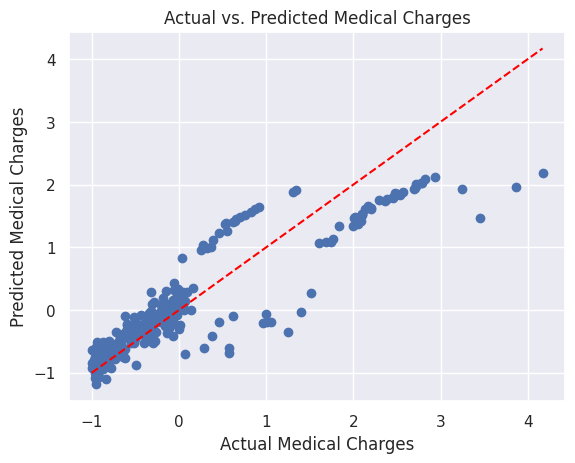

In [ ]:
#scatter plot between y_test and y_pred
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Linear regression line
plt.xlabel('Actual Medical Charges')
plt.ylabel('Predicted Medical Charges')
plt.title('Actual vs. Predicted Medical Charges')
plt.show()

In [ ]:
pd.DataFrame(reg_model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
age,0.287849
bmi,0.160543
children,0.053060
sex_male,-0.008388
smoker_yes,1.906335
region_northwest,-0.032361
region_southeast,-0.069299
region_southwest,-0.054448


These coefficients offer insights into how changes in these predictor variables relate to changes in the predicted insurance charges. As can be seen the coefficient for the "smoking" predictor variable is positive and relatively large, it suggests that being a smoker is associated with higher insurance charges. On the other hand, coefficient for the "region" is negative, it indicates that a person's region does not impact the charges.



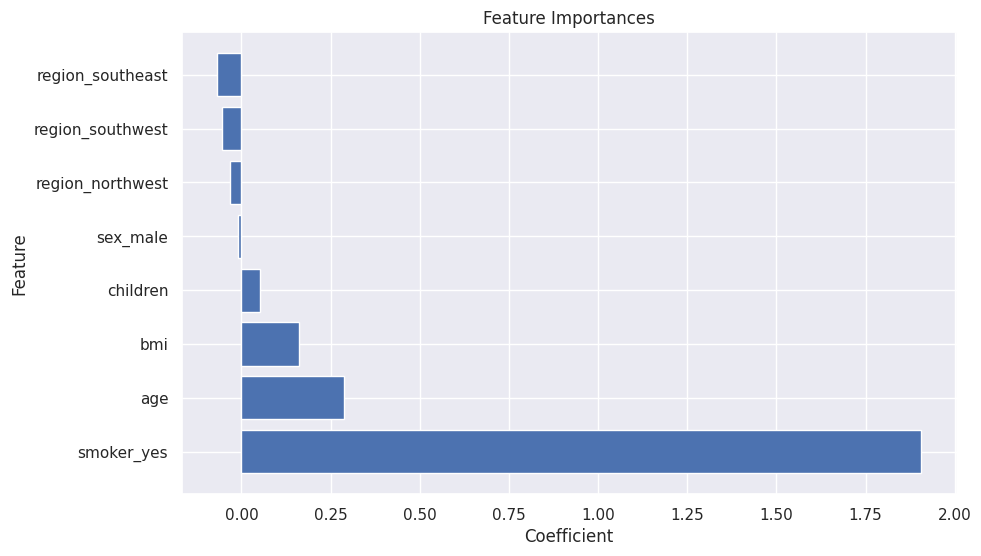

In [ ]:
# Get the coefficients of the model
coefficients = reg_model.coef_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importances = feature_importances.sort_values(by='Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In this analysis, we conducted a regression analysis on insurance dataset to predict medical insurance charges. The linear regression model demonstrated a decent performance, but further model optimization could be explored for even better results. The model's accuracy was acceptable, as evidenced by the low MSE, also the R2 value indicated a reasonable fit to the data. We see that smoking has the highest impact on charges, and charges also increase with age and bmi.

The results derived from the regression analysis highlight that factors such as region and gender do not carry substantial significance in terms of their impact on insurance charges. Instead, it becomes evident that charges are primarily shaped by variables like age, BMI, number of children, and smoking status. Among these attributes, smoking emerges as the most influential determinant, exerting a noteworthy influence on the magnitude of charges. In essence, while region and sex appear to have limited bearing on charges. Smoking seems to have the most inﬂuence on the charges

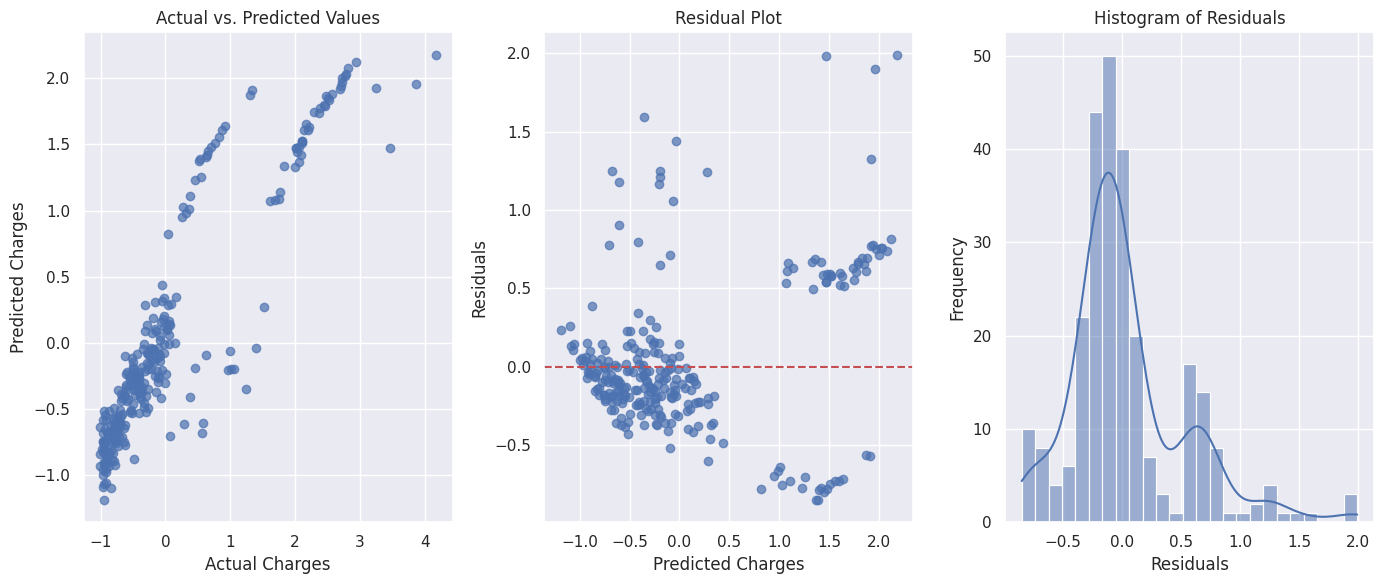

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

# Residual plot
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")

# Histogram of residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=25, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


A method for identifying outliers involves examining the difference between the anticipated and actual values, which are also known as residuals. An outlier would be characterized by a substantial distinction between the predicted and actual value.The plot shows a random pattern, indicating a good fit for a linear model.



<ipython-input-80-1b52d05bed37>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), ax=ax2, color='blue')


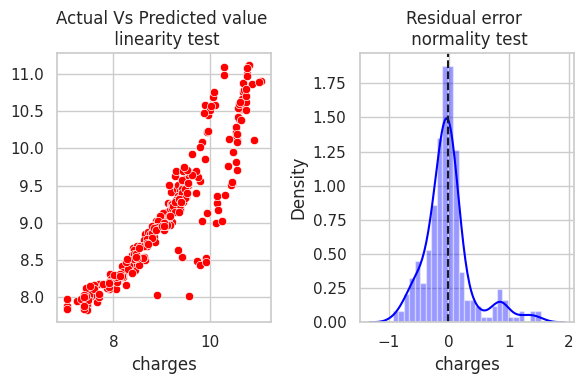

In [ ]:
f = plt.figure(figsize=(6, 4))

#Check for Linearity
ax1 = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax1, color='red')
ax1.set_title('Actual Vs Predicted value \n linearity test')

#Check for Residual normality & mean
ax2 = f.add_subplot(122)
sns.distplot((y_test - y_pred), ax=ax2, color='blue')
ax2.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax2.set_title('Residual error \n normality test')

plt.tight_layout()
plt.show()

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.

**Hyperparameter Tuning**

In [ ]:
#Hyperparameter tuning - Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor with Hyperparameter Tuning:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Dealing with a new and complex dataset was no walk in the park. It made me appreciate that real-world data is often messy and doesn't neatly fit into our analysis. We had to handle missing values, address outliers, and make tough decisions. It was a reminder that data analysis is not just about writing code; it's about understanding the data and the domain it represents. The heart of the lab was the linear regression analysis itself. We were trying to understand how factors like age, BMI, and smoking status influence insurance charges. It was fascinating to see the impact of each of these variables. Smoking stood out as a significant factor, which aligns with what we know about healthcare costs. The model evaluation part was essential. Metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) helped us understand how well our model performed. The low MAE indicated that our model's predictions were close to the actual values. This was crucial, especially in healthcare analytics, where precision is vital.

We used various visualization techniques to make sense of our results. Scatter plots and residual analysis helped us understand the relationships in our data and identify outliers. The residual plot showed that our linear model was suitable for this analysis. In a nutshell, the lab project wasn't just an assignment; it was a journey into the world of health analytics. It taught me about teamwork, the challenges of collaboration, and ultimately the potential for data-driven insights.